# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Specify the file path

file_path = '/Users/daphne/Downloads/DY_6.1/Prepared Data/DY_Chocolate_Ratings_df.xlsx'

In [3]:
# Import file

df = pd.read_excel(file_path)

In [4]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin,Reference #,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# 3. Correlation 

In [5]:
df.corr()

/var/folders/q2/bgrk_sqx3n796dlgvw46tclc0000gn/T/ipykernel_74404/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Reference #,Review Date,Rating
Reference #,1.000000,0.985076,0.101030
Review Date,0.985076,1.000000,0.099846
Rating,0.101030,0.099846,1.000000


There are few numeric columns that would be relavent to find a correlation between for this analysis. The ones that could be relavent (cocoa percent and rating & rating and review date) have negative correlations. A matrix heatmap is not helpful.

# 4. Scatterplot

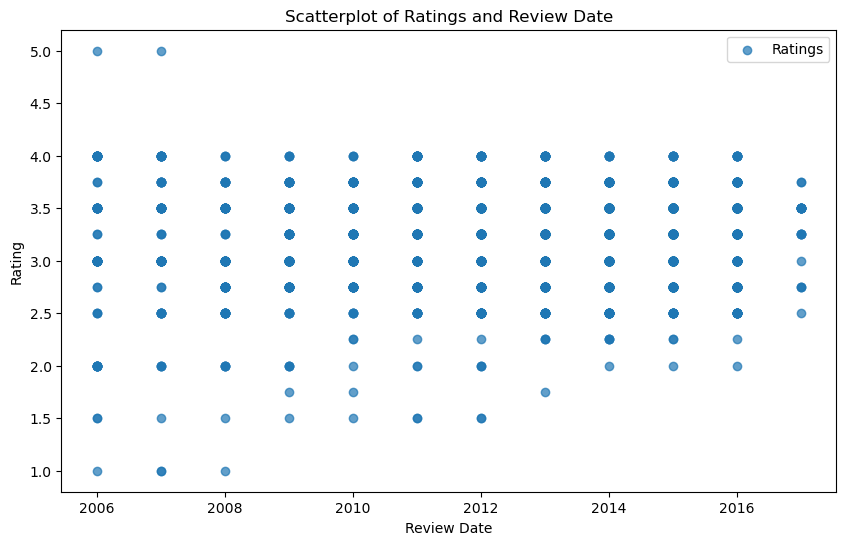

In [6]:
# Create a scatterplot for ratings and review date

plt.figure(figsize=(10, 6))
plt.scatter(df['Review Date'], df['Rating'], alpha=0.7, label='Ratings')
plt.title('Scatterplot of Ratings and Review Date')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.legend()
plt.show()

I made a scatterplot anyways, this is helpful to see that there was no '5.0' rating past 2007 and no '1.0' rating past 2008. This could mean that there genuinly was not an "elite" or "unpleasant" chocolate (that was tasted) since 2008, or maybe the rating criteria changed, there could be many reasons but this is not very concering. It looks like most chocolates have a rating between '2.5' and '4.0', I will look into this more.

In [7]:
# Converting Cocoa Percent to float 

df['Cocoa Percent'] = df['Cocoa Percent'].astype(str).str.rstrip('%').astype('float') / 100.0

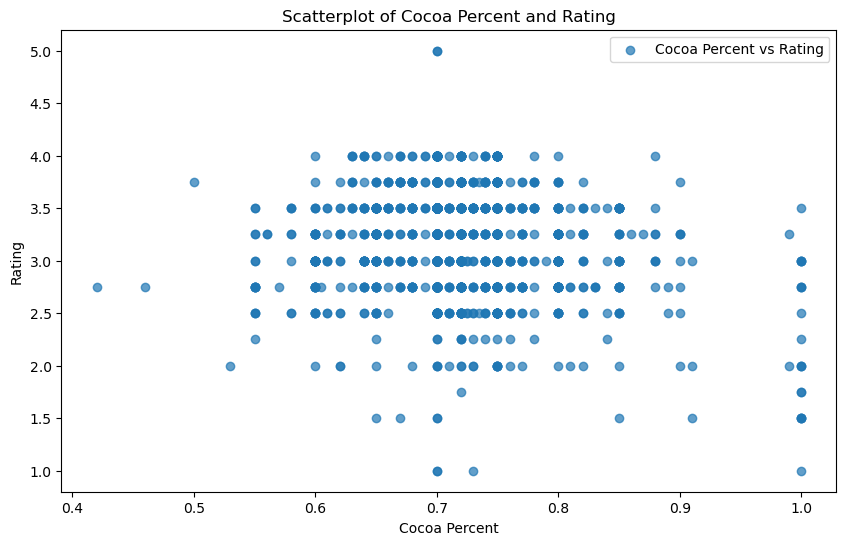

In [8]:
# Create a scatterplot for 'Cocoa Percent' and 'Rating'
plt.figure(figsize=(10, 6))
plt.scatter(df['Cocoa Percent'], df['Rating'], alpha=0.7, label='Cocoa Percent vs Rating')
plt.title('Scatterplot of Cocoa Percent and Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.legend()
plt.show()

I wanted to make this chart anyways as well. It appears that most of the chocolate bars tasted are around 60%-80% cocoa. Few chocolate bars are more than 85% cocoa and fewer are less than 65%. It's safe to assume that most luxury chocolates will not be under 50% cocoa, this is more common in cheaper chocolate and beyond 90% is known by most people to be far too dark and possibly unpleasent for many people. This scatterplot doesn't provide much but it is helpful to my understanding of the dataset. 

# 5. Pair plot

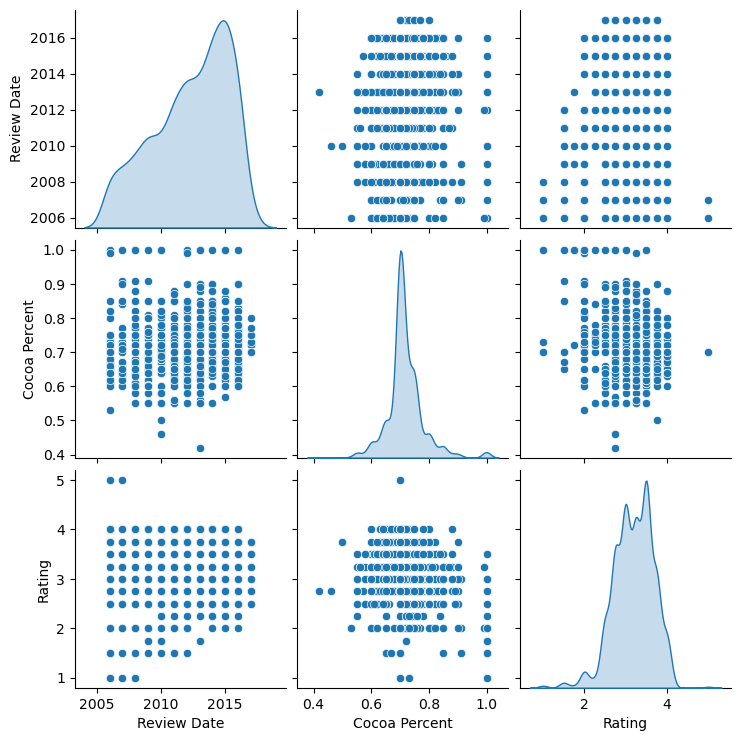

In [9]:
# Create a pair plot
sns.pairplot(df, vars=['Review Date', 'Cocoa Percent', 'Rating'], kind='scatter', diag_kind='kde')
plt.show()

Not much to say. 

# 6. Categorical plot

Text(0.5, 1.0, 'Cocoa Percent - Categorical Plot')

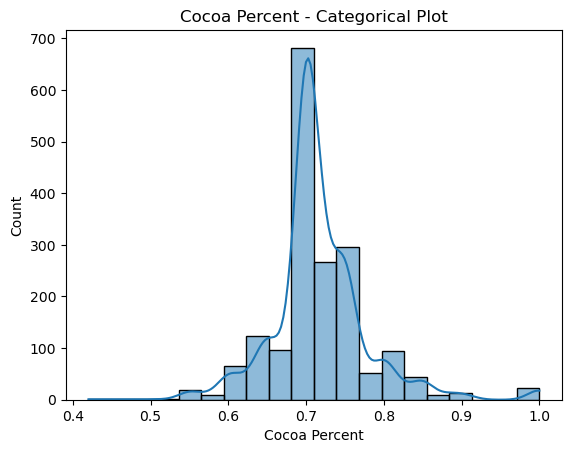

In [10]:
sns.histplot(df['Cocoa Percent'], bins = 20, kde = True)
plt.title('Cocoa Percent - Categorical Plot')

70% seems to be the sweet spot -- no pun intended. Looking at this chart, it apears that most chocolate bars in this dataset are are about 67% to 76% cocoa. This is expected given they are all suposed to be luxury chococlate bars. The data would be more consist if there was a diverse variety of cocoa percentages being tasted.

In [11]:
df.loc[df['Cocoa Percent'] < 0.0065, 'Percentage Category'] = 'Low Percentage'
df.loc[(df['Cocoa Percent'] >= 0.0065) & (df['Cocoa Percent'] < 0.0075), 'Percentage Category'] = 'Middle Percentage'
df.loc[df['Cocoa Percent'] >= 0.0075, 'Percentage Category'] = 'High Percentage'
df['Percentage Category'].value_counts(dropna=False)

High Percentage    1795
Name: Percentage Category, dtype: int64

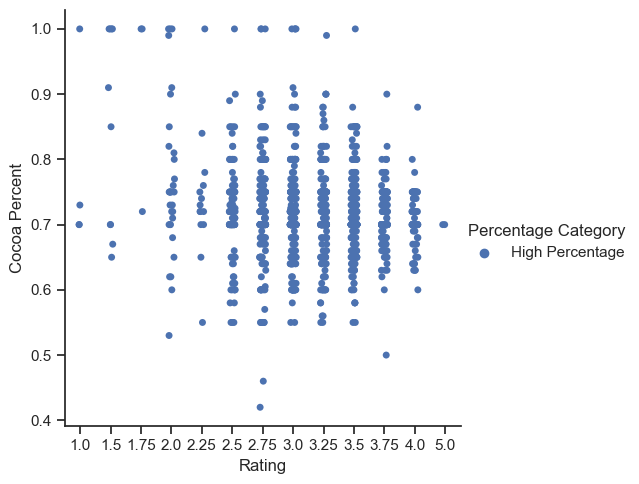

In [12]:
# Create a categorical plot

sns.set(style="ticks")
g = sns.catplot(x="Rating", y="Cocoa Percent", hue="Percentage Category", data=df)


Text(0.5, 1.0, 'Rating - Categorical Plot')

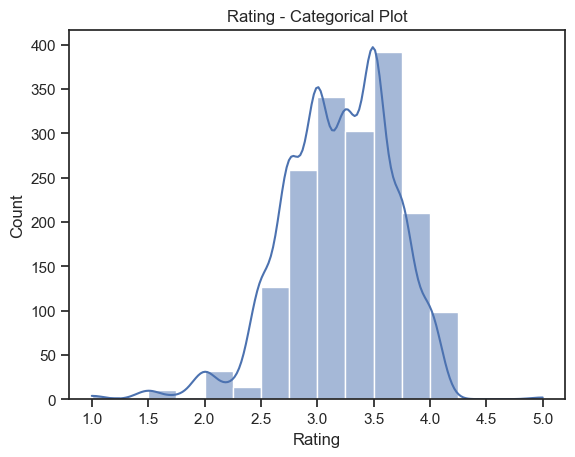

In [13]:
sns.histplot(df['Rating'], bins = 16, kde = True)
plt.title('Rating - Categorical Plot')

Very low and very high ratings are rare.

In [14]:
df.loc[df['Rating'] < 2.5, 'Rating Category'] = 'Low Rating'
df.loc[(df['Rating'] >= 2.5) & (df['Rating'] < 3.5), 'Rating Category'] = 'Middle Rating'
df.loc[df['Rating'] >= 3.5, 'Rating Category'] = 'High Rating'
df['Rating Category'].value_counts(dropna=False)

Middle Rating    1030
High Rating       702
Low Rating         63
Name: Rating Category, dtype: int64

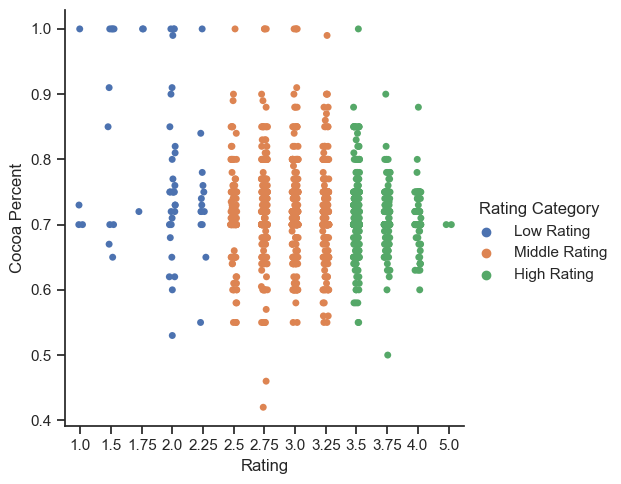

In [15]:
# Create a categorical plot

sns.set(style="ticks")
g = sns.catplot(x="Rating", y="Cocoa Percent", hue="Rating Category", data=df)

# 7. Questions to explore

#### Original questions

• Does the specific origin of cocoa beans affect a chocolate bar’s rating?

• Does the broad origin of cocoa beans affect a chocolate bar’s rating?

• Is there a specific company that produces the highest-rated chocolate bars?

• Does a company’s base country affect the ratings of their chocolate bars, or do
  companies based in specific countries have higher ratings than others?
  
• Do ratings change over time?

#### Questions answered 

• Do ratings change over time?

   No, not in any way that seems to have affected the authenticity of the dataset. 2007 is the last year a '5.0' rating was given to a chocolate bar, and 2008 is the last year a '1.0' rating was given (data is from 2006-2017). It is also intresting to note that a '4.5' rating has never been given. Moving forward, I will consider a '1.5' rating to be a low rating and a '4.0' rating to be very high. It is also important to note that a '5.0' rating was given the description "Transcending beyond the ordinary limits". The few chocolate bars given a '5.0' rating are likely very unique and may not reveal any sort of pattern, there is not enough '5.0' ratings to study what makes a perfect chcocolate bar.

# 8. Hypotheses

Based on the information i've learned so far, I don't have any current hypotheses. For my project, it makes more sense to create my hypotheses when I am able to look at geographic aspects of the dataset.